In [1]:
player = "Josh Donaldson"
years = [2015, 2017]

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
allSeasons = pd.read_csv("data/fangraphs/seasons.csv")
#allSeasons.info()

allPlayers = pd.read_csv("data/core/Batting.csv")
#allPlayers.info()

In [4]:
def getPlayer(player):
    thisPlayer = allPlayers[allPlayers["playerID"] == player]
    return thisPlayer

def wOBA(BB, HBP, H, doubles, triples, HR, AB, IBB, SF, season):
    thisSeason = allSeasons[allSeasons["season"] == season]
    aBB = BB * thisSeason["wBB"]
    aHBP = HBP * thisSeason["wHBP"]
    aH = (H-doubles-triples-HR) * thisSeason["w1B"]
    a2B = doubles * thisSeason["w2B"]
    a3B = triples * thisSeason["w3B"]
    aHR = HR * thisSeason["wHR"]
    return ((aBB + aHBP + aH + a2B + a3B + aHR)/(AB + BB - IBB + SF + HBP))

It's obvious to anyone who watched the Jays of the mid-2010s that Josh Donaldson simply raked in 2015. He has an MVP award to show for it, and the eye-test 

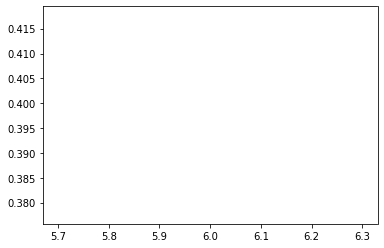

In [7]:
josh = getPlayer("donaljo02")
ys = josh[josh["season"] == 2015].squeeze()
#ys.info()
doubles = ys["2B"]
triples = ys["3B"]

joshwoba = wOBA(ys.BB, ys.HBP, ys.H, doubles, triples, ys.HR, ys.AB, ys.IBB, ys.SF, ys.season)
plt.plot(joshwoba)
